In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  


%matplotlib inline


In [2]:
url = "http://bit.ly/w-data"

data = pd.read_csv(url)

print("Data loaded")

data.head(10)

Data loaded


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


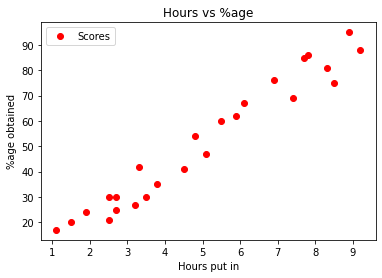

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [3]:
data.plot(x='Hours', y='Scores', style='o', c='red')  
plt.title('Hours vs %age')  
plt.xlabel('Hours put in')  
plt.ylabel('%age obtained')  
plt.show()

data.describe()
data.info()
data.corr()

In [4]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [6]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
print('Splitting complete')

Splitting complete


In [7]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train) 
print("Training complete.")

Training complete.


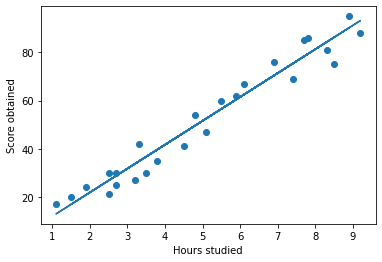

In [8]:
# Plotting the regression line
line = reg.coef_*X+reg.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.xlabel('Hours studied')
plt.ylabel('Score obtained')

plt.show()

In [9]:
print(X_test) # Testing data in Hours
y_pred = reg.predict(X_test) # Predicting the scores
y_pred

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [10]:
# Comparing Actual vs Predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df


,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [11]:
hours=9.25
pred_score=reg.predict([[hours]])
print("Number of hours = {}".format(hours))
print("Predicted Score = {}".format(pred_score[0]))

Number of hours = 9.25
Predicted Score = 93.69173248737535


In [12]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
